# Task 3: Linear Regression – Housing Price Prediction
Dataset: Housing.csv

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load Dataset

In [2]:

df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Basic Information

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Handle Missing Values

In [4]:

df = df.dropna()


## Encode Categorical Columns

In [5]:

df = pd.get_dummies(df, drop_first=True)
df.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Split Features and Target

In [6]:

X = df.drop('price', axis=1)
y = df['price']


## Train Test Split

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Linear Regression Model

In [8]:

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predictions

In [9]:

y_pred = model.predict(X_test)


## Evaluation Metrics

In [10]:

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 970043.4039201635
MSE: 1754318687330.663
R2 Score: 0.6529242642153186


## Regression Line (Using First Feature for Visualization)

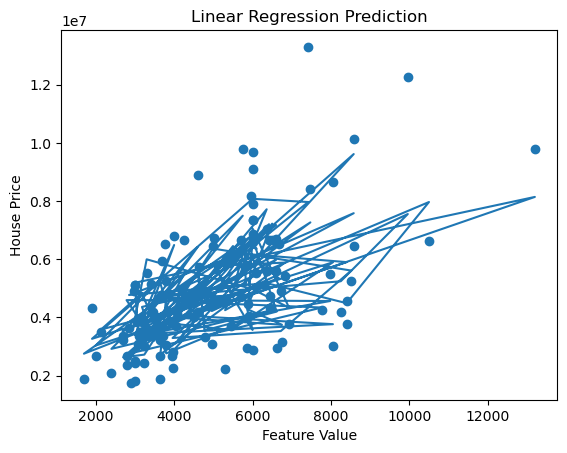

In [11]:

plt.scatter(X_test.iloc[:,0], y_test)
plt.plot(X_test.iloc[:,0], y_pred)
plt.xlabel("Feature Value")
plt.ylabel("House Price")
plt.title("Linear Regression Prediction")
plt.show()


## Model Coefficients

In [12]:

coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff


,Coefficient
area,2.359688e+02
bedrooms,7.677870e+04
bathrooms,1.094445e+06
stories,4.074766e+05
parking,2.248419e+05
mainroad_yes,3.679199e+05
guestroom_yes,2.316100e+05
basement_yes,3.902512e+05
hotwaterheating_yes,6.846499e+05
airconditioning_yes,7.914267e+05



## Conclusion

Implemented Linear Regression on Housing dataset.
Evaluated model using MAE, MSE and R2 score.
Interpreted coefficients to understand feature impact on house price.
